In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Intervention variablity among medical databases
### We define the blood prsure prior to intervention of Norepinphrine of any amount of dose  as "intervention BP". Here we will plot the distribution of those blood pressure within any database.

### load datasets

In [50]:
mimic = pd.read_csv("../rnl/RNLData/MIMIC_bps_with_doses.csv")
eicu = pd.read_csv("../rnl/RNLData/full_eICU_bps_with_doses.csv")

### subset for intervention only and set a sample size

In [66]:
mimic_intervention = mimic[mimic["dose"] > 0]["cur_bp"]
eicu_intervention = eicu[eicu["dose"] > 0]["cur_bp"]
sample_size = min(mimic_intervention.count(), eicu_intervention.count())
sample_size

22380

### subset databases by the sample size

In [67]:
mimic_intervention = mimic_intervention.sample(sample_size)
eicu_intervention = eicu_intervention.sample(sample_size)

## MIMIC 

In [68]:
mimic_intervention_var = mimic_intervention.var()
mimic_intervention_var

164.60693341185646

Text(0.5, 1.0, 'BPs prior to NOR injection histogram (MAP) - MIMIC \n variance: 164.61')

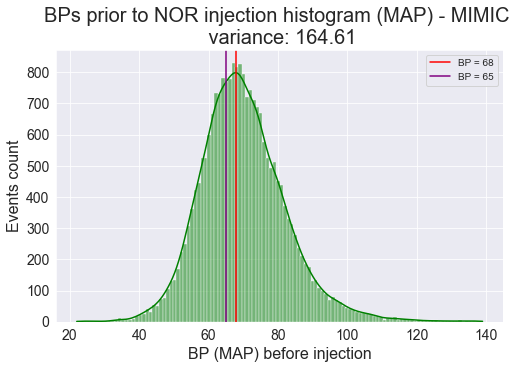

In [120]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
mimic_intervention_trimmed = mimic_intervention[(mimic_intervention > 20) & (mimic_intervention < 140)]
sns.histplot(mimic_intervention_trimmed, kde=True, bins=118, color="green")
plt.xlabel("BP (MAP) before injection", fontsize=16)
plt.ylabel("Events count", fontsize=16)
plt.xticks(fontsize=14)
plt.axvline(x=68, color="red", label="BP = 68")
plt.axvline(x=65, color="purple", label="BP = 65")
plt.yticks(fontsize=14)
plt.legend()
plt.title(f"BPs prior to NOR injection histogram (MAP) - MIMIC \n variance: {mimic_intervention_var :.2f}", fontsize=20)

## eICU

In [73]:
eicu_intervention_var = eicu_intervention.var()
eicu_intervention_var

124.12496021000632

Text(0.5, 1.0, 'BPs prior to NOR injection histogram (MAP) - eICU \n variance: 124.12')

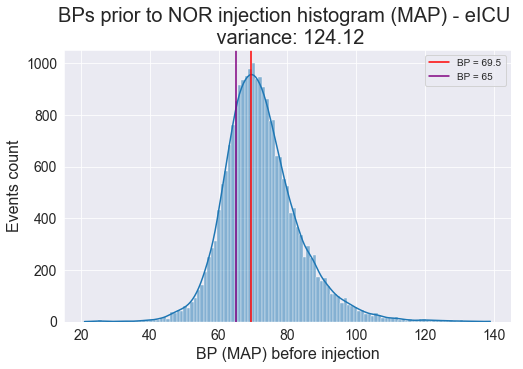

In [114]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
eicu_intervention_trimmed = eicu_intervention[(eicu_intervention > 20) & (eicu_intervention < 140)]
sns.histplot(eicu_intervention_trimmed, kde=True, bins=119)
plt.xlabel("BP (MAP) before injection", fontsize=16)
plt.ylabel("Events count", fontsize=16)
plt.xticks(fontsize=14)
plt.axvline(x=69.5, color="red", label="BP = 69.5")
plt.axvline(x=65, color="purple", label="BP = 65")
plt.yticks(fontsize=14)
plt.legend()
plt.title(f"BPs prior to NOR injection histogram (MAP) - eICU \n variance: {eicu_intervention_var :.2f}", fontsize=20)

# Dosage rate vs BP rate in databases
### In the previous graphs we shoed only the distribution of the intervention BPs, without takie into account the dose rate iteself. Here we give a plot of the dosage Vs the bp rate in each database

In [81]:
mimic_dosage = mimic[mimic["dose"] > 0][["cur_bp", "dose"]]
eicu_dosage = eicu[eicu["dose"] > 0][["cur_bp", "dose"]]

## MIMIC

Text(0.5, 1.0, 'NOR dosage per BP (MAP) - MIMIC')

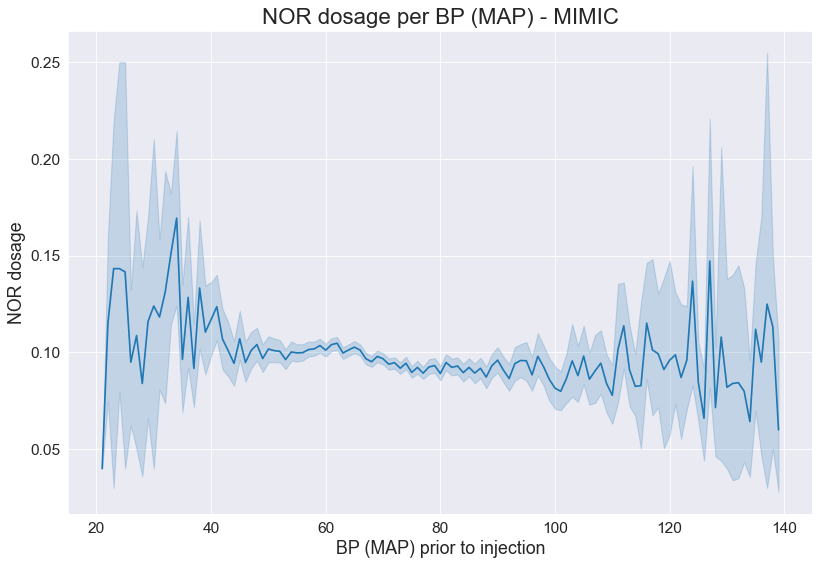

In [119]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12,8), dpi=80)
mimic_dosage_subset = mimic_dosage[(mimic_dosage["cur_bp"]>20) & (mimic_dosage["cur_bp"] <140) & (mimic_dosage["dose"]<0.4)]
sns.lineplot(data=mimic_dosage_subset, x="cur_bp", y="dose")
plt.xlabel("BP (MAP) prior to injection", fontsize=16)
plt.ylabel("NOR dosage", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("NOR dosage per BP (MAP) - MIMIC", fontsize=20)

## eICU

Text(0.5, 1.0, 'NOR dosage per BP (MAP) - eICU')

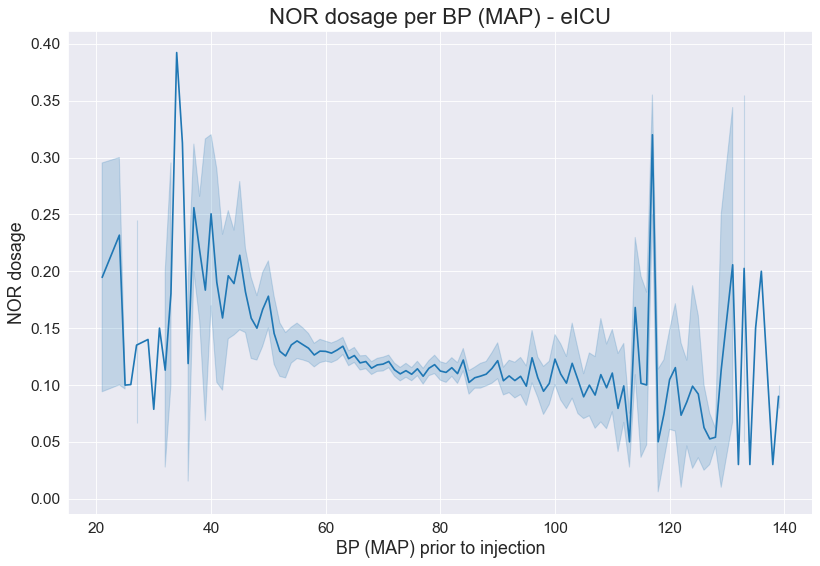

In [118]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12,8), dpi=80)
eicu_dosage_subset = eicu_dosage[(eicu_dosage["cur_bp"]<200) & (eicu_dosage["cur_bp"]>0) & (eicu_dosage["dose"]<0.4)]
sns.lineplot(data=eicu_dosage_subset, x="cur_bp", y="dose")
plt.xlabel("BP (MAP) prior to injection", fontsize=16)
plt.ylabel("NOR dosage", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("NOR dosage per BP (MAP) - eICU", fontsize=20)